# **```STABLE DIFFUSION INPAINTING```**




In [ ]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install compel

In [24]:
import torch
from diffusers import StableDiffusionInpaintPipeline

import requests
from PIL import Image
from io import BytesIO

In [3]:
import PIL
from PIL import Image

# Code for visualization of input image and generated image
def image_grid(imgs, rows, cols):
    """
    This function takes a list of images and creates a grid of images from them.

    Args:
    imgs (list): List of images to be used in the grid.
    rows (int): Number of rows in the grid.

    Returns:
    grid (Image): The grid of images.
    """

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

### **1) Stable Diffusion Model**

In [ ]:
# Download the model
pipeline = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

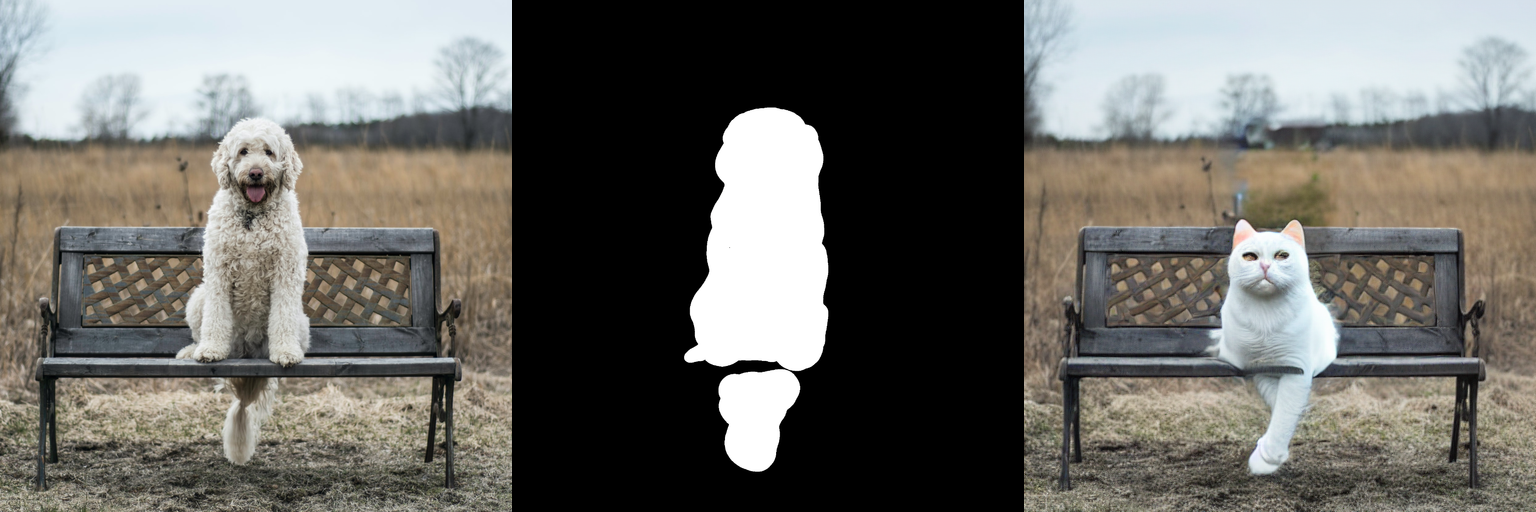

In [28]:
generator = torch.Generator("cuda").manual_seed(92)

image_path = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"

response_i = requests.get(image_path)
init_image = Image.open(BytesIO(response_i.content)).convert("RGB")
init_image = init_image.resize((512, 512))

mask_path = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

response_m = requests.get(mask_path)
mask_image = Image.open(BytesIO(response_m.content)).convert("RGB")
mask_image = mask_image.resize((512, 512))

prompt = "a white cat sitting on a bench"

image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
image_grid([init_image, mask_image, image], rows=1, cols=3)

### **2) Stable Diffusion Inpainting Model**

In [ ]:
# Download the model
pipeline = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16, variant="fp16").to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

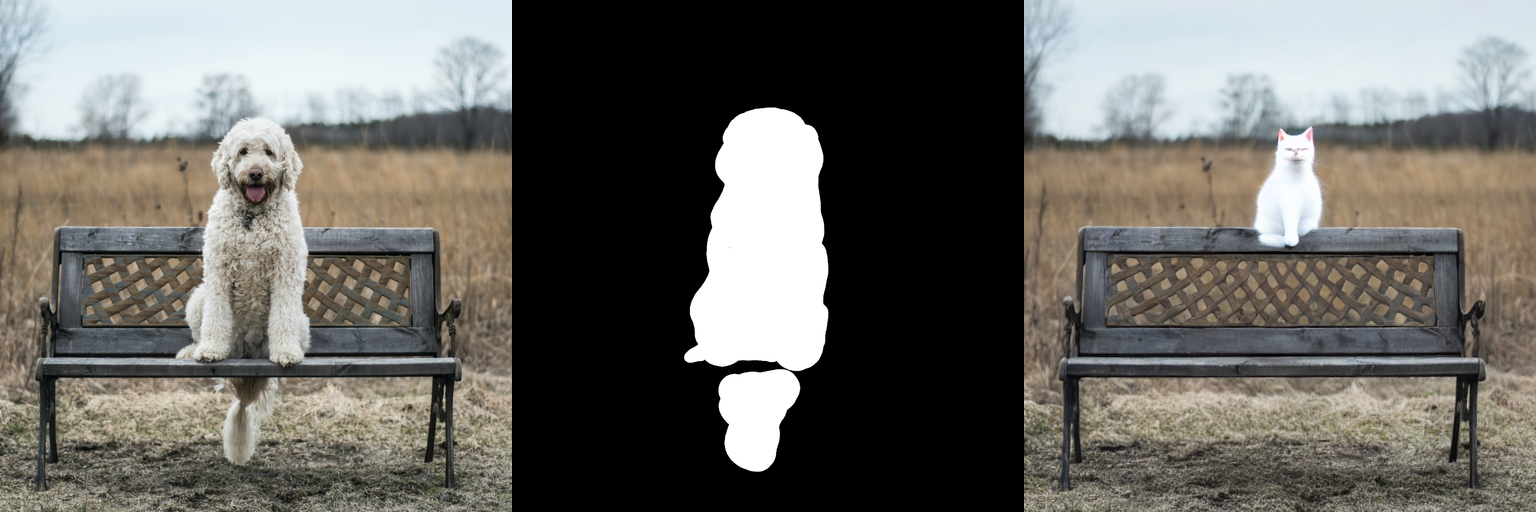

In [21]:
generator = torch.Generator("cuda").manual_seed(92)

image_path = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"

response_i = requests.get(image_path)
init_image = Image.open(BytesIO(response_i.content)).convert("RGB")
init_image = init_image.resize((512, 512))

mask_path = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

response_m = requests.get(mask_path)
mask_image = Image.open(BytesIO(response_m.content)).convert("RGB")
mask_image = mask_image.resize((512, 512))

prompt = "a white cat sitting on a bench"

image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
image_grid([init_image, mask_image, image], rows=1, cols=3)

### 3) Stable Diffusion v2 Inpainting Model

In [ ]:
# Download the model
pipeline = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting", torch_dtype=torch.float16, variant="fp16").to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

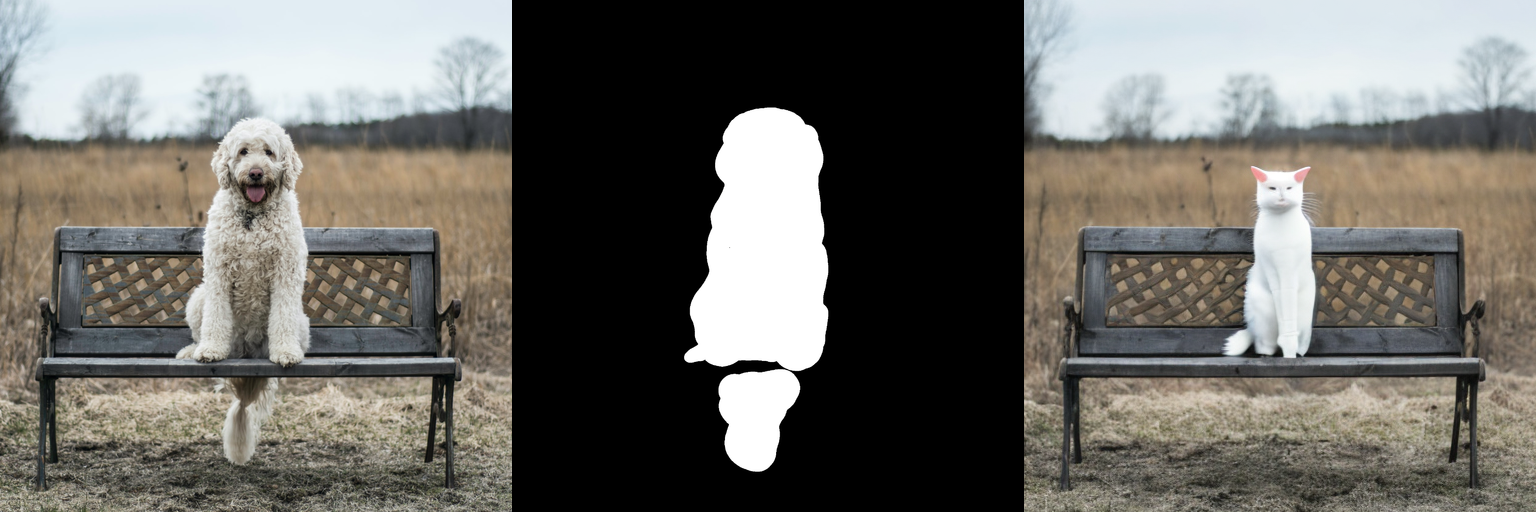

In [41]:
generator = torch.Generator("cuda").manual_seed(92)

image_path = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"

response_i = requests.get(image_path)
init_image = Image.open(BytesIO(response_i.content)).convert("RGB")
init_image = init_image.resize((512, 512))

mask_path = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

response_m = requests.get(mask_path)
mask_image = Image.open(BytesIO(response_m.content)).convert("RGB")
mask_image = mask_image.resize((512, 512))

prompt = "a white cat sitting on a bench"

image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
image_grid([init_image, mask_image, image], rows=1, cols=3)